## **Mapping the Census with Python**

By: Thomas Lillo

**3V61 Final Project**

Welcome to Google Colab Notebooks. If this is your first time viewing a notebook there are a few things you should know. All the code viewed below can be run by clicking the "play" button that appears when you hover over the "[      ]" part of the code section. If the code has output, it will appear below the code section. Some of the code is dependent on code higher up in the document, so it is important that the code sections are run in order. 

**Try running the code below.**

In [0]:
print("hello world")

hello world


**The Data**

This notebook will teach you the basics of working with spatial data in Python, how to import and clean, and how to create useful visualizations. This tutorial uses a CSV and a SHP file, they are available to download from this Google Drive Folder:

https://drive.google.com/drive/folders/1dD6x38CQ3edL8Z_BkgAHvw_W7nqrJHR4?usp=sharing

**Getting Data From Google Drive**

You can use Google Drive to store the data that will be used in the notebook you create. To access this data you need to connect to your Google Drive by running the code below and following the steps. You will need to sign into the Google Account where you uploaded the files for this tutorial.

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


Once you've mounted your Google Drive, you'll be able to access files you've saved to it.

## **Working with CSV Data**

**Opening CSV Data**

First we need to open the CSV data we will be using in the tutorial and save it into an object. Before we can do this, we need to import the pandas library and numpy.

In [0]:
import numpy as np
import pandas as pd

Now that you have pandas, were going to use it's read_csv function to bring in the data from Google Drive. The path to the data might be different in your Google Drive than the example below, depending on where you uploaded it.

In [0]:
# the path to the data in your Google Drive
csvpath = "/content/drive/My Drive/CensusData/CensusData.csv"
# reading the csv from the drive and storing it into a variable
csvdata = pd.read_csv(csvpath)

We can view the top 5 rows of the data we stored in csvdata with the .head function in pandas. Getting the head() will allow you to see all the field names and the types of data within each field. 

In [0]:
csvdata.head()

,GEO UID,Province code,Province name,CD code,CD name,DA name,Population 2016,Total private dwellings,Private dwellings occupied by usual residents,Population density per square kilometre,Land area in square kilometres,Total 0 to 14 years,Total 0 to 4 years,Total 5 to 9 years,Total 10 to 14 years,Total 15 to 64 years,Total 15 to 19 years,Total 20 to 24 years,Total 25 to 29 years,Total 30 to 34 years,Total 35 to 39 years,Total 40 to 44 years,Total 45 to 49 years,Total 50 to 54 years,Total 55 to 59 years,Total 60 to 64 years,Total 65 years and over,Total 65 to 69 years,Total 70 to 74 years,Total 75 to 79 years,Total 80 to 84 years,Total 85 years and over,Total 85 to 89 years,Total 90 to 94 years,Total 95 to 99 years,Total 100 years and over,Average age of the population,Median Total Income in 2015,Num After Tax Income Recipients Aged 15 and Over,Median After Tax Income 2015,...,Housing - Not condominium,Housing - No bedrooms,Housing - 1 bedroom,Housing - 2 bedrooms,Housing - 3 bedrooms,Housing - 4 or more bedrooms,Housing - 1 to 4 rooms,Housing - 5 rooms,Housing - 6 rooms,Housing - 7 rooms,Housing - 8 or more rooms,Average Rooms per Dwelling,Housing - Suitable,Housing - Not suitable,Housing - Construction 1960 or before,Housing - Construction 1961 to 1980,Housing - Construction 1981 to 1990,Housing - Construction 1991 to 2000,Housing - Construction 2001 to 2005,Housing - Construction 2006 to 2010,Housing - Construction 2011 to 2016,% with mortgage,% with mortgage spending 30% or more of income shelter,Median monthly shelter costs for owned dwellings,Average monthly shelter costs for owned dwellings,Median value of dwellings,Average value of dwellings,% of tenant households in subsidized housing,% of tenant hh spending 30% or more income on shelter,Median monthly shelter costs for rented dwellings,Average monthly shelter costs for rented dwellings,"Education - No certificate, diploma or degree",Education - Secondary (high) school diploma or equivalency certificate,"Education - Postsecondary certificate, diploma or degree",Labour - Employed,Labour - Unemployed,Labour - Not in the labour force,Labour - Participation rate,Labour - Employment rate,Labour - Unemployment rate
0,1001,10,Newfoundland and Labrador,1,Division No. 1,0,270348.0,131336.0,112620.0,29.3,9220.61,40625.0,12530.0,14260.0,13840.0,183680.0,14150.0,16665.0,17595.0,17645.0,17690.0,18455.0,19500.0,21420.0,20930.0,19625.0,46040.0,17280.0,11995.0,7555.0,4910.0,4300.0,2730.0,1215.0,300.0,55.0,41.9,35687.0,218575.0,31985.0,...,109230.0,185.0,7210.0,23540.0,51730.0,29960.0,17415.0,16455.0,19285.0,17255.0,42210.0,7.0,110605.0,2015.0,19910.0,32690.0,17485.0,13540.0,8185.0,10340.0,10465.0,57.5,12.7,1056.0,1201.0,299072.0,308833.0,20.9,41.0,880.0,905.0,38815.0,57290.0,130055.0,126905.0,14960.0,84295.0,62.7,56.1,10.5
1,10010165,10,Newfoundland and Labrador,1,Division No. 1,165,506.0,229.0,213.0,1326.3,0.38,55.0,15.0,15.0,25.0,365.0,25.0,45.0,45.0,25.0,20.0,25.0,30.0,45.0,50.0,70.0,85.0,40.0,20.0,5.0,10.0,5.0,0.0,0.0,0.0,0.0,44.4,40192.0,435.0,35072.0,...,230.0,0.0,15.0,25.0,115.0,75.0,30.0,20.0,25.0,30.0,125.0,7.9,225.0,0.0,10.0,80.0,140.0,10.0,0.0,0.0,0.0,47.1,14.7,1019.0,1226.0,329763.0,344179.0,0.0,50.0,910.0,990.0,60.0,95.0,320.0,305.0,15.0,165.0,66.7,63.5,4.7
2,10010166,10,Newfoundland and Labrador,1,Division No. 1,166,327.0,161.0,147.0,3427.7,0.10,35.0,15.0,5.0,10.0,220.0,20.0,20.0,25.0,15.0,15.0,15.0,20.0,20.0,35.0,40.0,70.0,35.0,25.0,5.0,5.0,0.0,0.0,5.0,0.0,0.0,45.3,43904.0,285.0,38080.0,...,135.0,0.0,20.0,0.0,55.0,55.0,15.0,30.0,10.0,30.0,65.0,7.6,135.0,0.0,10.0,60.0,60.0,10.0,0.0,0.0,0.0,27.8,17.6,634.0,935.0,321360.0,332502.0,0.0,40.0,955.0,971.0,15.0,45.0,170.0,125.0,20.0,85.0,63.0,54.3,13.8
3,10010167,10,Newfoundland and Labrador,1,Division No. 1,167,431.0,201.0,181.0,3407.1,0.13,45.0,10.0,15.0,20.0,295.0,25.0,30.0,25.0,30.0,20.0,35.0,20.0,25.0,50.0,50.0,85.0,50.0,25.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,44.7,39936.0,380.0,35157.0,...,155.0,10.0,20.0,30.0,45.0,60.0,35.0,15.0

First, were going to need to filter out all the rows that do not represent DAs. We can do this by selecting rows based on a condition. In this case we want to make sure the Geography Unique ID (GEO UID) field is at least 8 characters, anything less won't be a DA.

The DAs in this file are stored as int values, so the conditonal operation that we use will reflect this.



In [0]:
# rename GEO UID to just UID to make it easier on myself
csvdata.rename(columns={'GEO UID':'UID'}, inplace=True)

# Every DA as a value will be at least 10000000
DAList = csvdata[csvdata.UID >= 1000000]

# get the head
DAList.head()

,UID,Province code,Province name,CD code,CD name,DA name,Population 2016,Total private dwellings,Private dwellings occupied by usual residents,Population density per square kilometre,Land area in square kilometres,Total 0 to 14 years,Total 0 to 4 years,Total 5 to 9 years,Total 10 to 14 years,Total 15 to 64 years,Total 15 to 19 years,Total 20 to 24 years,Total 25 to 29 years,Total 30 to 34 years,Total 35 to 39 years,Total 40 to 44 years,Total 45 to 49 years,Total 50 to 54 years,Total 55 to 59 years,Total 60 to 64 years,Total 65 years and over,Total 65 to 69 years,Total 70 to 74 years,Total 75 to 79 years,Total 80 to 84 years,Total 85 years and over,Total 85 to 89 years,Total 90 to 94 years,Total 95 to 99 years,Total 100 years and over,Average age of the population,Median Total Income in 2015,Num After Tax Income Recipients Aged 15 and Over,Median After Tax Income 2015,...,Housing - Not condominium,Housing - No bedrooms,Housing - 1 bedroom,Housing - 2 bedrooms,Housing - 3 bedrooms,Housing - 4 or more bedrooms,Housing - 1 to 4 rooms,Housing - 5 rooms,Housing - 6 rooms,Housing - 7 rooms,Housing - 8 or more rooms,Average Rooms per Dwelling,Housing - Suitable,Housing - Not suitable,Housing - Construction 1960 or before,Housing - Construction 1961 to 1980,Housing - Construction 1981 to 1990,Housing - Construction 1991 to 2000,Housing - Construction 2001 to 2005,Housing - Construction 2006 to 2010,Housing - Construction 2011 to 2016,% with mortgage,% with mortgage spending 30% or more of income shelter,Median monthly shelter costs for owned dwellings,Average monthly shelter costs for owned dwellings,Median value of dwellings,Average value of dwellings,% of tenant households in subsidized housing,% of tenant hh spending 30% or more income on shelter,Median monthly shelter costs for rented dwellings,Average monthly shelter costs for rented dwellings,"Education - No certificate, diploma or degree",Education - Secondary (high) school diploma or equivalency certificate,"Education - Postsecondary certificate, diploma or degree",Labour - Employed,Labour - Unemployed,Labour - Not in the labour force,Labour - Participation rate,Labour - Employment rate,Labour - Unemployment rate
1,10010165,10,Newfoundland and Labrador,1,Division No. 1,165,506.0,229.0,213.0,1326.3,0.38,55.0,15.0,15.0,25.0,365.0,25.0,45.0,45.0,25.0,20.0,25.0,30.0,45.0,50.0,70.0,85.0,40.0,20.0,5.0,10.0,5.0,0.0,0.0,0.0,0.0,44.4,40192.0,435.0,35072.0,...,230.0,0.0,15.0,25.0,115.0,75.0,30.0,20.0,25.0,30.0,125.0,7.9,225.0,0.0,10.0,80.0,140.0,10.0,0.0,0.0,0.0,47.1,14.7,1019.0,1226.0,329763.0,344179.0,0.0,50.0,910.0,990.0,60.0,95.0,320.0,305.0,15.0,165.0,66.7,63.5,4.7
2,10010166,10,Newfoundland and Labrador,1,Division No. 1,166,327.0,161.0,147.0,3427.7,0.10,35.0,15.0,5.0,10.0,220.0,20.0,20.0,25.0,15.0,15.0,15.0,20.0,20.0,35.0,40.0,70.0,35.0,25.0,5.0,5.0,0.0,0.0,5.0,0.0,0.0,45.3,43904.0,285.0,38080.0,...,135.0,0.0,20.0,0.0,55.0,55.0,15.0,30.0,10.0,30.0,65.0,7.6,135.0,0.0,10.0,60.0,60.0,10.0,0.0,0.0,0.0,27.8,17.6,634.0,935.0,321360.0,332502.0,0.0,40.0,955.0,971.0,15.0,45.0,170.0,125.0,20.0,85.0,63.0,54.3,13.8
3,10010167,10,Newfoundland and Labrador,1,Division No. 1,167,431.0,201.0,181.0,3407.1,0.13,45.0,10.0,15.0,20.0,295.0,25.0,30.0,25.0,30.0,20.0,35.0,20.0,25.0,50.0,50.0,85.0,50.0,25.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,44.7,39936.0,380.0,35157.0,...,155.0,10.0,20.0,30.0,45.0,60.0,35.0,15.0,10.0,20.0,75.0,7.3,150.0,10.0,0.0,50.0,90.0,20.0,0.0,0.0,0.0,50.0,0.0,865.0,1190.0,349128.0,355642.0,0.0,50.0,849.0,908.0,40.0,100.0,185.0,180.0,25.0,115.0,62.5,56.2,12.5
4,10010168,10,Newfoundland and Labrador,1,Division No. 1,168,524.0,273.0,242.0,2743.5,0.19,45.0,10.0,20.0,10.0,365.0,30.0,35.0,35.0,25.0,35.0,30.0,40.0,35.0,45.0,55.0,115.0,40.0,30.0,15.0,15.0,5.0,5.0,5.0,5.0,0.0,46.2,40747.0,465.0,34944.0,...,260.0,0.0,40.0,35.0,105.0,80.0,60.0,25.0,35.0,20.0,125.0,7.0,250.0,10.0,0.0,115.0,130.0,20.0,0.0,0.0,0.0,55.9,14.3,1372.0,1254.0,309832.0,316059.0,0.0,17.6,842.0,826.0,75.0,70.0,370.0,280.0,35.0,200

You can also use the describe() function to get basic stats about all the fields in the table, which is is useful for data validation. This will only assess and display colums containing  quantitative data.

In [0]:
# describe the data
DAList.describe()

,UID,Province code,CD code,DA name,Population 2016,Total private dwellings,Private dwellings occupied by usual residents,Population density per square kilometre,Land area in square kilometres,Total 0 to 14 years,Total 0 to 4 years,Total 5 to 9 years,Total 10 to 14 years,Total 15 to 64 years,Total 15 to 19 years,Total 20 to 24 years,Total 25 to 29 years,Total 30 to 34 years,Total 35 to 39 years,Total 40 to 44 years,Total 45 to 49 years,Total 50 to 54 years,Total 55 to 59 years,Total 60 to 64 years,Total 65 years and over,Total 65 to 69 years,Total 70 to 74 years,Total 75 to 79 years,Total 80 to 84 years,Total 85 years and over,Total 85 to 89 years,Total 90 to 94 years,Total 95 to 99 years,Total 100 years and over,Average age of the population,Median Total Income in 2015,Num After Tax Income Recipients Aged 15 and Over,Median After Tax Income 2015,"Income - Total Under $10,000 (including loss)","Income - Total $10,000 to $19,999",...,Housing - Not condominium,Housing - No bedrooms,Housing - 1 bedroom,Housing - 2 bedrooms,Housing - 3 bedrooms,Housing - 4 or more bedrooms,Housing - 1 to 4 rooms,Housing - 5 rooms,Housing - 6 rooms,Housing - 7 rooms,Housing - 8 or more rooms,Average Rooms per Dwelling,Housing - Suitable,Housing - Not suitable,Housing - Construction 1960 or before,Housing - Construction 1961 to 1980,Housing - Construction 1981 to 1990,Housing - Construction 1991 to 2000,Housing - Construction 2001 to 2005,Housing - Construction 2006 to 2010,Housing - Construction 2011 to 2016,% with mortgage,% with mortgage spending 30% or more of income shelter,Median monthly shelter costs for owned dwellings,Average monthly shelter costs for owned dwellings,Median value of dwellings,Average value of dwellings,% of tenant households in subsidized housing,% of tenant hh spending 30% or more income on shelter,Median monthly shelter costs for rented dwellings,Average monthly shelter costs for rented dwellings,"Education - No certificate, diploma or degree",Education - Secondary (high) school diploma or equivalency certificate,"Education - Postsecondary certificate, diploma or degree",Labour - Employed,Labour - Unemployed,Labour - Not in the labour force,Labour - Participation rate,Labour - Employment rate,Labour - Unemployment rate
count,5.659000e+04,56590.000000,56590.000000,56590.000000,56553.000000,56553.000000,56553.000000,56545.000000,56590.000000,55003.000000,55003.000000,55003.000000,55003.000000,55003.000000,55003.00000,55003.000000,55003.000000,55003.000000,55003.000000,55003.000000,55003.000000,55003.000000,55003.000000,55003.000000,55003.000000,55003.000000,55003.000000,55003.000000,55003.000000,55003.000000,55003.000000,55003.000000,55003.000000,55003.000000,55003.000000,53219.000000,53219.000000,53219.000000,53219.000000,53219.000000,...,54963.000000,54963.000000,54963.000000,54963.000000,54963.000000,54963.000000,54963.000000,54963.000000,54963.000000,54963.000000,54963.000000,54963.000000,54963.000000,54963.000000,54963.000000,54963.000000,54963.000000,54963.000000,54963.000000,54963.000000,54963.000000,54963.000000,52909.000000,54963.000000,54963.000000,5.496300e+04,5.496300e+04,54963.000000,52909.000000,54963.000000,54963.000000,54963.000000,54963.000000,54963.000000,54963.000000,54963.000000,54963.000000,54963.000000,54963.000000,54963.000000
mean,3.639974e+07,36.117795,28.119562,746.996872,621.571411,272.530953,248.829929,3337.743220,158.430653,106.113485,34.509209,36.674181,34.948094,424.507300,36.76754,40.677872,41.491191,42.290784,41.570096,40.967765,42.860480,48.649619,47.598495,41.605367,107.757940,35.825682,25.802502,18.548534,13.599895,13.968965,8.753159,4.030507,1.029398,0.143901,41.886546,35497.118341,512.045040,31793.894267,72.128845,87.060636,...,221.799756,1.703419,35.019104,64.509579,87.938886,66.742809,74.012336,39.568892,36.024871,32.545713,73.729054,6.472199,243.257100,12.652603,56.845878,76.134400,35.954278,31.753361,17.757400,19.812965,17.640867,55.866603,13.494460,1072.690464,1195.495260,3.911241e+

We won't need all of the colums for our analysis, we can select the colums were interested in using and save them into a new variable using the loc() function.

In [0]:
# creating the selction of fields we want to store in the variable
data = DAList.loc[:,['UID','Province name','Population 2016','Population density per square kilometre',
                     'Median After Tax Income 2015','% of tenant hh spending 30% or more income on shelter',
                     '% with mortgage spending 30% or more of income shelter','Education - Postsecondary certificate, diploma or degree',
                     'Labour - Unemployment rate']]

# display the data we just stored
data.head()

,UID,Province name,Population 2016,Population density per square kilometre,Median After Tax Income 2015,% of tenant hh spending 30% or more income on shelter,% with mortgage spending 30% or more of income shelter,"Education - Postsecondary certificate, diploma or degree",Labour - Unemployment rate
1,10010165,Newfoundland and Labrador,506.0,1326.3,35072.0,50.0,14.7,320.0,4.7
2,10010166,Newfoundland and Labrador,327.0,3427.7,38080.0,40.0,17.6,170.0,13.8
3,10010167,Newfoundland and Labrador,431.0,3407.1,35157.0,50.0,0.0,185.0,12.5
4,10010168,Newfoundland and Labrador,524.0,2743.5,34944.0,17.6,14.3,370.0,11.3
5,10010169,Newfoundland and Labrador,311.0,4705.0,33152.0,44.4,0.0,165.0,6.5


Now we're going to visualize the data a bit with a popular 2D plotting library called **Matplotlib** and another called **Seaborn**. Within the matplotlib library were going to be using it's pyplot functions.

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

The first thing were going to do is create a **histogram** of the median after tax income.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Count of DAs')

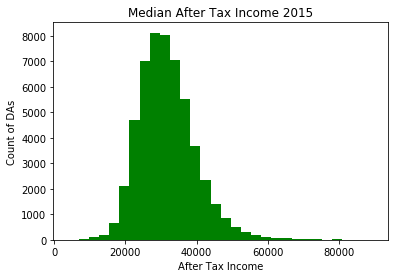

In [0]:
# create figure and axis
fig, ax = plt.subplots()

# create the histogram
ax.hist(data['Median After Tax Income 2015'],bins=30,color='green')

# you can create titles and axis labels here
ax.set_title('Median After Tax Income 2015')
ax.set_xlabel('After Tax Income')
ax.set_ylabel('Count of DAs')

Now that we can see the distribution of income, lets plot income against population density to see if we find anything.

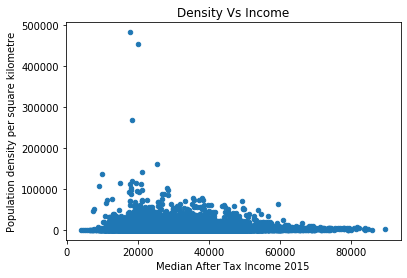

In [0]:
# create the scatter plot with 
data.plot.scatter(x='Median After Tax Income 2015', y='Population density per square kilometre', title='Density Vs Income')

There are a few outliers within the data that we should remove. We'll perform another conditional selection to take out any DA with a population density above 100,000 per square kilometer.

In [0]:
# anything below 100000
data2 = data[data['Population density per square kilometre'] <= 100000]

# Show the new counts to previous 56590 rows
data2.describe()

,UID,Population 2016,Population density per square kilometre,Median After Tax Income 2015,% of tenant hh spending 30% or more income on shelter,% with mortgage spending 30% or more of income shelter,"Education - Postsecondary certificate, diploma or degree",Labour - Unemployment rate
count,5.653100e+04,56531.000000,56531.000000,53205.000000,52895.000000,52895.000000,54949.000000,54949.000000
mean,3.640230e+07,621.378943,3293.960687,31797.388065,21.579820,13.490880,287.680577,8.264134
std,1.331023e+07,540.513545,5075.118314,7963.561632,24.059277,12.158239,272.557336,6.139203
min,1.001016e+07,0.000000,0.000000,4008.000000,0.000000,0.000000,0.000000,0.000000
25%,2.466269e+07,426.000000,184.350000,26272.000000,0.000000,0.000000,175.000000,4.700000
50%,3.521161e+07,519.000000,2172.900000,30976.000000,0.000000,13.200000,230.000000,7.100000
75%,4.715027e+07,667.000000,4055.650000,36224.000000,42.100000,20.800000,320.000000,10.600000
max,6.208003e+07,22077.000000,98205.100000,89600.000000,150.000000,150.000000,10795.000000,100.000000


Now lets replot the same graph and see how it looks.

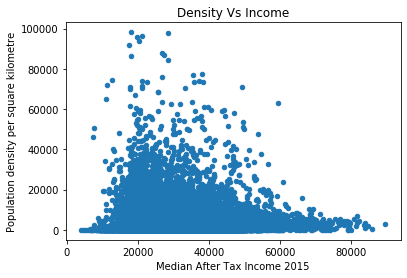

In [0]:
# create the scatter plot with 
data2.plot.scatter(x='Median After Tax Income 2015', y='Population density per square kilometre', title='Density Vs Income')

Lets begin to compate just Alberta, Ontario, Quebec, and British Columbia. First we should create a new dataset with just the Provinces we're interested in.

In [0]:
# create a new variable with only the 4 Provinces
data3 = data2[(data2['Province name'] == 'Ontario')| # in pandas the "|" symbol is used as a "or"
              (data2['Province name'] == 'British Columbia')|
              (data2['Province name'] == 'Alberta')|
              (data2['Province name'] == 'Quebec')]

# show us how many rows we have now
data3.describe()

,UID,Population 2016,Population density per square kilometre,Median After Tax Income 2015,% of tenant hh spending 30% or more income on shelter,% with mortgage spending 30% or more of income shelter,"Education - Postsecondary certificate, diploma or degree",Labour - Unemployment rate
count,4.718400e+04,47184.000000,47184.000000,45053.000000,44825.000000,44825.000000,46172.000000,46172.000000
mean,3.761223e+07,642.241650,3676.126083,31981.558476,22.142168,14.462532,299.818721,7.803179
std,1.184673e+07,560.439454,5370.238035,7997.988359,24.115932,12.405389,282.446336,5.259217
min,2.401002e+07,0.000000,0.000000,7496.000000,0.000000,0.000000,0.000000,0.000000
25%,2.479008e+07,434.000000,420.000000,26400.000000,0.000000,0.000000,180.000000,4.500000
50%,3.521135e+07,527.000000,2486.800000,31168.000000,18.500000,14.300000,240.000000,7.000000
75%,4.806131e+07,683.000000,4439.000000,36437.000000,42.500000,22.000000,330.000000,10.200000
max,5.959003e+07,22077.000000,98205.100000,89600.000000,150.000000,150.000000,10795.000000,100.000000


Lets use color to seperate the Proviences in the next scatter plot. This is easy to do in the seaborn scatter plot.

In [0]:
# create a scatter plot, set prov as the hue variable
sns.scatterplot(x='Median After Tax Income 2015', y='Population density per square kilometre', 
                hue='Province name', data=data3)

Seaborn has a huge library of very useful charts, that can be customized in may ways. 

In [0]:
# we can see how many DAs are in each Provience.
sns.countplot(data3['Province name'])

In [0]:
# We can create a boxplot of median after-tax income for each Province.
sns.boxplot('Province name', 'Median After Tax Income 2015', data=data3)

## **Working with Spatial Data**

We will now start working with spatial data in Python. Python is a useful tool for creating spatial visualizations and conducting spatial analysis of large data sets that programs like Excel wouldn't be able to handle.

**Importing Spatial Data**

We have to import the spatial data stored in the Google Drive. To do this, we need the GeoPandas library, unfortunatly this is not available in Google Colab, so we will have to use a workaround to install it. 

The code below is a command line script that will install GeoPandas on your computer. You may need to have Python downloaded locally. If you do need Python, a download link can be found at the end of this notebook.

***This will take 5-7 minutes to run***

In [0]:
#@title Default title text
# print the CPU and wall time for the entire cell
%%time
!apt update
!apt upgrade
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes
"""
You may need to install folium and its requirements too, if so remove the 
hashtags in front of the lines of code below this comment and run the cell again.
"""
# !pip install branca
# !pip install jinja2
# !pip install requests
# !pip install folium

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:14 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic/main Sources [1,745

Now that geopandas is installed, you can import it and begin to work with spatial data. This is a similar process as with a csv, but we will use a geopandas function.

In [0]:
import geopandas as gpd

# path to the shapefile in your Google Drive
spatialpath = '/content/drive/My Drive/CensusData/lda_000b16a_e.shp'
# geopandas read file function
spatialdata = gpd.read_file(spatialpath)

# view the head of the spatial file
spatialdata.head()

,DAUID,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,CSDUID,CSDNAME,CSDTYPE,ERUID,ERNAME,SACCODE,SACTYPE,CMAUID,CMAPUID,CMANAME,CMATYPE,CTUID,CTNAME,ADAUID,geometry
0,10010244,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001519,St. John's,1001519,St. John's,CY,1010,Avalon Peninsula,001,1,001,10001,St. John's,B,0010004.00,0004.00,10010014,"POLYGON ((8976851.149 2149576.543, 8976818.149..."
1,10010245,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001519,St. John's,1001519,St. John's,CY,1010,Avalon Peninsula,001,1,001,10001,St. John's,B,0010016.02,0016.02,10010010,"POLYGON ((8977202.180 2150836.794, 8977136.277..."
2,10010246,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001519,St. John's,1001519,St. John's,CY,1010,Avalon Peninsula,001,1,001,10001,St. John's,B,0010016.02,0016.02,10010010,"POLYGON ((8977549.383 2150892.566, 8977492.269..."
3,10010247,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001519,St. John's,1001519,St. John's,CY,1010,Avalon Peninsula,001,1,001,10001,St. John's,B,0010016.02,0016.02,10010010,"POLYGON ((8977682.314 2151083.183, 8977689.440..."
4,10010248,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001519,St. John's,1001519,St. John's,CY,1010,Avalon Peninsula,001,1,001,10001,St. John's,B,0010004.00,0004.00,10010014,"POLYGON ((8978152.474 2151142.586, 8978040.654..."


You can easily plot shp files with the matplotlib plot() function. We can map all the DAs in Canada very quickly.

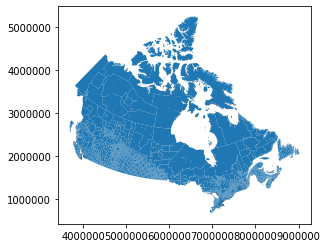

In [0]:
spatialdata.plot()

We can join the csv and the new spatial file to create maps. The spatial file has a lot of information that we will not need, we can create a new file in the same way we did with the csv.

In [0]:
# just take the DA ID, Prov. ID, and the geometry
spdata = spatialdata.loc[:,['DAUID','PRUID','geometry']]

# make sure it worked
spdata.head()

,DAUID,PRUID,geometry
0,10010244,10,"POLYGON ((8976851.149 2149576.543, 8976818.149..."
1,10010245,10,"POLYGON ((8977202.180 2150836.794, 8977136.277..."
2,10010246,10,"POLYGON ((8977549.383 2150892.566, 8977492.269..."
3,10010247,10,"POLYGON ((8977682.314 2151083.183, 8977689.440..."
4,10010248,10,"POLYGON ((8978152.474 2151142.586, 8978040.654..."


We can also filter out the Provinces we don't need in the same way as we did with the CSV.

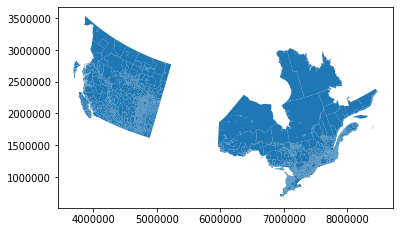

In [0]:
# Prov Codes: ON = 35, QC = 24, AB = 48, BC = 59

# select based on the PRUID, they were stored as strings in the files
spdata2 = spdata[(spdata['PRUID'] == '24') |
                 (spdata['PRUID'] == '35') |
                 (spdata['PRUID'] == '48') |
                 (spdata['PRUID'] == '59')]

# plot the data to make sure we got what we want
spdata2.plot()

Now lets join the csv data to the spatial file.

In [0]:
# rename the DAUID to just UID
spdata2.rename(columns={'DAUID':'UID'}, inplace=True)

# in data3 UID is a int, and in spdata2 its a string, so I have to change it
# to merge the two
data3['UID'] = data3['UID'].astype(str)

# merge data based on UID
alldata = spdata2.merge(data3,on='UID')

# show me the merge
alldata.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,UID,PRUID,geometry,Province name,Population 2016,Population density per square kilometre,Median After Tax Income 2015,% of tenant hh spending 30% or more income on shelter,% with mortgage spending 30% or more of income shelter,"Education - Postsecondary certificate, diploma or degree",Labour - Unemployment rate
0,24010037,24,"POLYGON ((8399015.009 1763139.226, 8399418.374...",Quebec,1165.0,25.4,24009.0,27.8,10.3,440.0,15.7
1,24080061,24,"POLYGON ((7944608.126 1749348.737, 7944612.917...",Quebec,741.0,486.1,31360.0,0.0,5.4,365.0,10.3
2,24080062,24,"POLYGON ((7944445.431 1748911.486, 7944456.469...",Quebec,474.0,2433.3,28096.0,0.0,0.0,235.0,10.4
3,24080063,24,"POLYGON ((7944216.960 1747888.149, 7944210.994...",Quebec,435.0,683.1,25651.0,33.3,0.0,160.0,12.0
4,24080064,24,"POLYGON ((7944042.734 1749460.703, 7944035.991...",Quebec,505.0,2930.9,22336.0,34.8,18.8,175.0,16.7


Now we have a complete set of data that we can work with.

In [0]:
# check to make sure the data is all there still by plotting it
alldata.plot()

Now that we have our data joined to our spatial filem we can create some maps to show how the various geographies are different. Since DAs are small, we will just be mapping one Province at a time.

In [0]:
# select just the BC DAs
bc = alldata[(alldata['PRUID'] == '59')]

# plot the BC DAs by unemployment rate
bc.plot(column='Labour - Unemployment rate')

You can add additional elements to the maps with more code.

In [0]:
# set up the figure with matplotlib
fig, ax = plt.subplots(1,1)

# plot the same map but I added a label to the legend
bc.plot(column='Labour - Unemployment rate', ax=ax, legend=True, 
        legend_kwds={'label':'Unemployment Rate by DA','orientation':'vertical'})

Lets do one fro Alberta too, but with some different colors using the cmap option. More color options can be found here: https://matplotlib.org/tutorials/colors/colormaps.html

In [0]:
# create alberta
ab = alldata[alldata['PRUID'] == '48']

# set up the figure
fig, ax = plt.subplots(1,1)

# plot alberta unemployment
ab.plot(column='Labour - Unemployment rate', cmap='afmhot', ax=ax, legend=True)

In [0]:
# or just plot AB without any color in it.
ab.plot(color='white',edgecolor='black')
# this is useful for layering data

Next we're going to learn how to plot two layers in a single map. This is useful for showing point data over polygon data. Our data will not overlap, but this will show you how to plot two layers at the same time.

In [0]:
# create the base layer
base = ab.plot(color='blue',edgecolor='red')

# plot the second layer
bc.plot(ax=base,color='green',edgecolor='black')

## **Bonus: Creating Web Maps**

You can create custom web maps without any existing data. This can be done in a Python package called Folium that takes advantage of the leaflet.js maps. Import folium to begin.

In [0]:
import folium

Create a basic map with the coordinates in the middle and store it in a variable.

In [0]:
map1 = folium.Map(location=[43.153509, -79.249545],
                  zoom_start=12)

Display the map by executing the variable where it is stored.

In [0]:
map1

You can add a lat/long pop up when users click on the map with the LatLngPopup function. Click on the map to see the lat and long of the location. 

In [0]:
map1.add_child(folium.LatLngPopup())

You can easily save the maps that you create as html files, these can be opened with a web browser. When run outside of Google Colab, you are prompted with the option to save the map locally. In Google Colab it should appear in your files tab (where you mounted the drive).

In [0]:
# should be saved in the Google Drive files
map1.save('map1.html')

Open Street Map is the default map for folium, but there are other map styles that can be used: 

- Stamen Terrain
- Stamen Toner

And many more that can be found by googleing the package tiles.

In [0]:
folium.Map(
    location=[40.753473, -73.983066],
    tiles='Stamen Toner',
    zoom_start=12)

The 'Stamen Terrain' tile can be used to display a 3D model of the landscape.

In [0]:
folium.Map(
    location=[50.114730, -122.962598],
    tiles='Stamen Terrain',
    zoom_start=11)


**Adding Markers to Folium Maps**

In [0]:
# Drawing map2
map2 = folium.Map(location=[43.121295, -79.238422],
          zoom_start=14)

# Text to display when hovering over a marker
label = 'Click Here!'

# coordiantes can be entered in prior to creating the point
brock = [43.116933, -79.247413]

# Creating a point and adding it to map2
folium.Marker(brock,
             popup='<i>Brock University</i>',
             tooltip=label).add_to(map2)

# display map2
map2

Folium has a function that allows users to add new markers to the map. Click on the map to create a point!

In [0]:
map2.add_child(folium.ClickForMarker(popup='Cool Spot'))

# display map2
map2

Markers are customizable, their color and icon type can be changed depending on the need.

In [0]:
# locations to mark
tt = [40.762729, -73.973861] # trump tower
ts = [40.758926, -73.984901] # time square
nmm = [40.743232, -73.987486] # national museum of mathamatics

# create the map
map3 = folium.Map(location=[40.753473, -73.983066],
                  tiles='Stamen Toner',
                  zoom_start=13)

# label for the header
l = 'Click'

# create the markers
folium.Marker(location=tt,
             popup='<i>Trump Tower</i>',
             icon=folium.Icon(color='red',icon='flag')).add_to(map3)

folium.Marker(location=ts,
             popup='<i>Time Square</i>',
             icon=folium.Icon(color='blue',icon='star')).add_to(map3)

folium.Marker(location=nmm,
             popup='<i>National Museum of Mathamatics</i>',
             icon=folium.Icon(color='green',icon='info-sign')).add_to(map3)

# draw the map
map3

You can also highlight areas of the map with circles!

In [0]:
# the centre of the circle
bp = [40.753099, -73.983109] # bryant park

# create the map
map4 = folium.Map(location=bp,
                 zoom_start=16)

# draw the circle
folium.Circle(radius=400,
              location=bp,
              popup='Bryant Park Area',
              color='#3186cc',
              fill=True,
             ).add_to(map4)

# draw the map
map4

Folium maps can be a useful addition to a interactive visualization or application.

## **Additional Information & Help**

**HOW TO INSTALL PYTHON & PACKAGES LOCALLY**

First, you need Python:

https://www.python.org/downloads/

Then you can install packages using the cmd:

https://packaging.python.org/tutorials/installing-packages/

**Learning Python Programming**

For those who learn best from text, Automate the Boring Stuff with Python is a very useful free resource available online. You will learn the basics of Python then how to immediatly apply your new skills.

https://automatetheboringstuff.com/

For audio/visual learners, there is a free course available from the University of Toronto on Coursera that provides a great introduction to programming in Python. 

https://www.coursera.org/learn/learn-to-program

**Pandas Documentation**

Documentation is Available Here: https://pandas.pydata.org/pandas-docs/stable/


**Seaborn Documentation**

To learn more about Seaborn and what you can do with it, or view the seaborn gallery. Visit the link below:

https://seaborn.pydata.org/

**GeoPandas Documentation**

For more infromation on how to use the GeoPandas package, all the information is available through this link.

GeoPandas Documentation: 
http://geopandas.org/index.html

**Folium Documentation**

For more infromation on how to use the folium package, all the information is available through this link.

Folium Documentation: 
https://python-visualization.github.io/folium/quickstart.html#Getting-Started